In [186]:
# Assignment 2: Data Cleaning & Management in Practice
# Topic: Impact of Social Media Influencer Marketing on Consumer Buying Behavior

import pandas as pd
import numpy as np


# 01.Data Collection #

In [187]:
infl = pd.read_csv("/content/Impact of Social Media.csv")    # Impact of Social Media dataset
soc  = pd.read_excel("/content/Influencer Marketing ROI Dataset.xlsx") # Influencer Marketing ROI dataset

In [188]:
print("Influencer shape:", infl.shape)
infl.head()




Influencer shape: (400, 3)


,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [189]:
print("Social media shape:", soc.shape)
soc.head()

Social media shape: (300, 15)


,Consumer ID,Customer Name,Age,Gender,Income (USD),Education Level,Social Media Usage (Hours/Day),Social Media Platforms,Influence Level,Purchase Decision,Product Category,Specific Product,Amount Spent (USD),Brand Name,City
0,1,Alice Johnson,28,Female,45000,Bachelor's,2.5,"Instagram, Twitter",Very Influential,Yes,Fashion,Dress,200,"Nike, Zara",New York
1,2,Bob Smith,35,Male,60000,Master's,1.8,"Facebook, Instagram",Somewhat Influential,Yes,Electronics,Smartphone,800,"Apple, Samsung",Los Angeles
2,3,Chris Taylor,22,Non-binary,32000,High School,4.0,"TikTok, Snapchat",Not Influential,No,NaN,NaN,0,NaN,Chicago
3,4,David Brown,40,Male,75000,PhD,3.2,"Facebook, LinkedIn",Very Influential,Yes,Food,Burger,50,McDonald's,Houston
4,5,Emily White,29,Female,55000,Bachelor's,2.0,"Instagram, TikTok",Somewhat Influential,Yes,Beauty,Makeup,100,Sephora,Miami


In [190]:
display(soc.dtypes)

,0
Consumer ID,int64
Customer Name,object
Age,int64
Gender,object
Income (USD),int64
Education Level,object
Social Media Usage (Hours/Day),float64
Social Media Platforms,object
Influence Level,object
Purchase Decision,object


In [191]:
display(infl.dtypes)

,0
Age,int64
EstimatedSalary,int64
Purchased,int64


# 2. Data Cleaning #

## 2. a) Handling duplicated values ##


In [192]:
# Check Duplicated values in infl
infl.duplicated().sum()


np.int64(33)

In [193]:
infl.drop_duplicates(inplace=True)
print("Duplicated values in infl after dropping:", infl.duplicated().sum())

Duplicated values in infl after dropping: 0


In [194]:
# Check Duplicated values in soc
soc.duplicated().sum()



np.int64(0)

## 2. b) Handling missing values ##

In [195]:
# Check missing values in infl
infl.isnull().sum()

,0
Age,0
EstimatedSalary,0
Purchased,0


In [196]:
# Check missing values in soc
soc.isnull().sum()

,0
Consumer ID,0
Customer Name,0
Age,0
Gender,0
Income (USD),0
Education Level,0
Social Media Usage (Hours/Day),0
Social Media Platforms,0
Influence Level,0
Purchase Decision,0


In [197]:
# Fill missing categorical values in soc dataset with 'Unknown' as it's categorical
soc['Product Category'] = soc['Product Category'].fillna('Unknown')
soc['Specific Product'] = soc['Specific Product'].fillna('Unknown')
soc['Brand Name'] = soc['Brand Name'].fillna('Unknown')


In [198]:
soc.isnull().sum()


,0
Consumer ID,0
Customer Name,0
Age,0
Gender,0
Income (USD),0
Education Level,0
Social Media Usage (Hours/Day),0
Social Media Platforms,0
Influence Level,0
Purchase Decision,0


## 2. c) Identifying outliers ##



In [199]:
# choose numeric columns in soc that make sense for outliers

numeric_cols_soc = soc.select_dtypes(include=['int64', 'float64']).columns
numeric_cols_soc
print(numeric_cols_soc)

numeric_cols_infl = infl.select_dtypes(include=['int64', 'float64']).columns
numeric_cols_infl
print(numeric_cols_infl)

Index(['Consumer ID', 'Age', 'Income (USD)', 'Social Media Usage (Hours/Day)',
       'Amount Spent (USD)'],
      dtype='object')
Index(['Age', 'EstimatedSalary', 'Purchased'], dtype='object')


In [200]:
soc[numeric_cols_soc].quantile([0.25, 0.75])

,Consumer ID,Age,Income (USD),Social Media Usage (Hours/Day),Amount Spent (USD)
0.25,75.75,27.0,51000.0,2.475,30.0
0.75,225.25,32.0,62000.0,2.900,200.0


In [201]:
infl[numeric_cols_infl].quantile([0.25, 0.75])

,Age,EstimatedSalary,Purchased
0.25,29.5,43000.0,0.0
0.75,46.0,89000.0,1.0


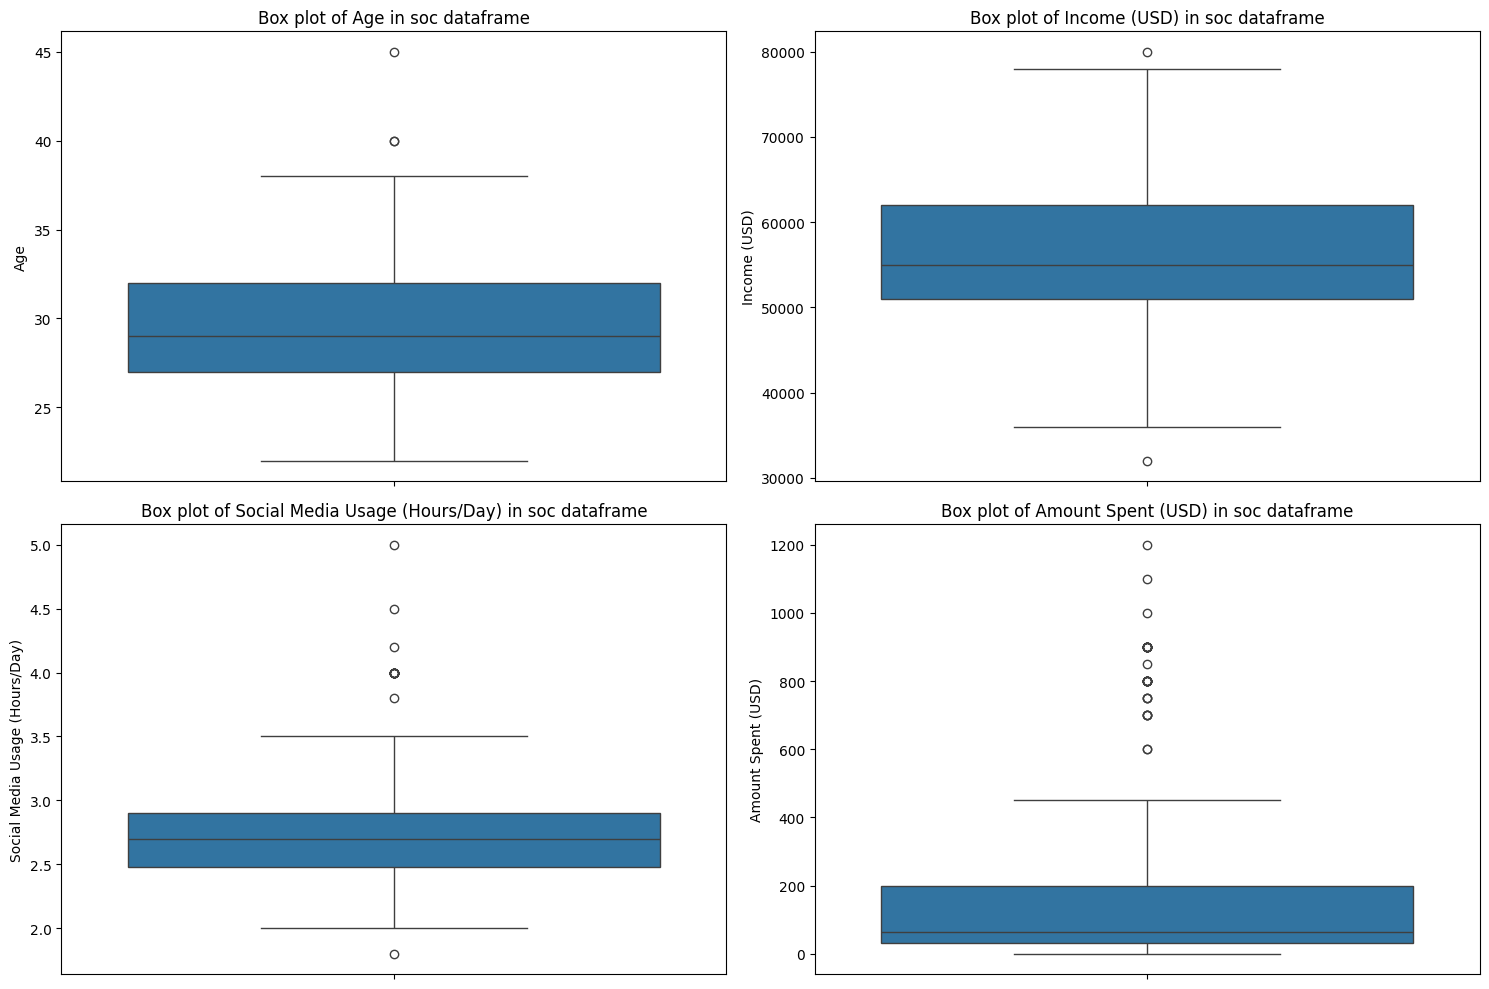

In [202]:
import matplotlib.pyplot as plt
import seaborn as sns

# Numeric columns for soc dataframe (excluding 'Consumer ID' as it's an identifier)

numeric_cols_soc_for_boxplot = ['Age', 'Income (USD)', 'Social Media Usage (Hours/Day)', 'Amount Spent (USD)']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols_soc_for_boxplot, 1):
    plt.subplot(2, 2, i) # Arrange plots in 2x2 grid
    sns.boxplot(y=soc[col])
    plt.title(f'Box plot of {col} in soc dataframe')
plt.tight_layout()
plt.show()

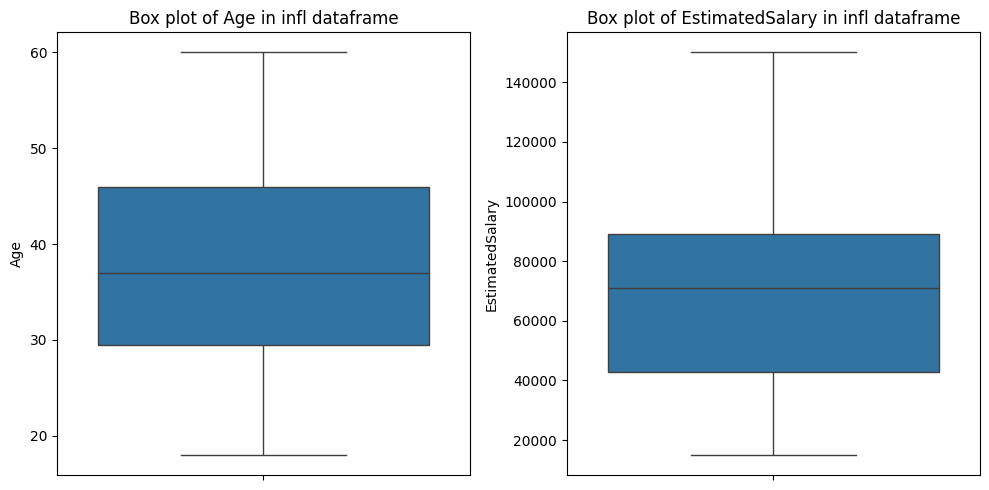

In [203]:
# Numeric columns for infl dataframe (excluding 'Purchased' as it's a binary target variable)

numeric_cols_infl_for_boxplot = ['Age', 'EstimatedSalary']

plt.figure(figsize=(10, 5))
for i, col in enumerate(numeric_cols_infl_for_boxplot, 1):
    plt.subplot(1, 2, i) # Arrange plots in 1x2 grid
    sns.boxplot(y=infl[col])
    plt.title(f'Box plot of {col} in infl dataframe')
plt.tight_layout()
plt.show()

In [204]:
# Numeric Outlier Check using IQR method

print("Outliers in soc dataframe:")
numeric_cols_soc_outliers = ['Age', 'Income (USD)', 'Social Media Usage (Hours/Day)', 'Amount Spent (USD)']
for col in numeric_cols_soc_outliers:
    Q1 = soc[col].quantile(0.25)
    Q3 = soc[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = soc[(soc[col] < lower_bound) | (soc[col] > upper_bound)]
    print(f"  {col}: {len(outliers)} outliers")



Outliers in soc dataframe:
  Age: 3 outliers
  Income (USD): 2 outliers
  Social Media Usage (Hours/Day): 17 outliers
  Amount Spent (USD): 35 outliers


In [205]:
print("Outliers in infl dataframe:")
numeric_cols_infl_outliers = ['Age', 'EstimatedSalary']
for col in numeric_cols_infl_outliers:
    Q1 = infl[col].quantile(0.25)
    Q3 = infl[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = infl[(infl[col] < lower_bound) | (infl[col] > upper_bound)]
    print(f"  {col}: {len(outliers)} outliers")

Outliers in infl dataframe:
  Age: 0 outliers
  EstimatedSalary: 0 outliers


## 2. c) Handling outliers: Applying Capping / Winsorization ##

In [206]:
# Numeric Outlier Capping using IQR method

numeric_cols_soc_outliers = ['Age','Income (USD)', 'Social Media Usage (Hours/Day)', 'Amount Spent (USD)']

for col in numeric_cols_soc_outliers:
    Q1 = soc[col].quantile(0.25)
    Q3 = soc[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Apply capping

    soc[col] = soc[col].clip(lower=lower_bound, upper=upper_bound)

print("Capping done successfully!")


Capping done successfully!


In [207]:
print("Outliers after capping:")
for col in numeric_cols_soc_outliers:
    Q1 = soc[col].quantile(0.25)
    Q3 = soc[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = soc[(soc[col] < lower_bound) | (soc[col] > upper_bound)]
    print(f"{col}: {len(outliers)} outliers")


Outliers after capping:
Age: 0 outliers
Income (USD): 0 outliers
Social Media Usage (Hours/Day): 0 outliers
Amount Spent (USD): 0 outliers


## 2. d) Fixing Data Types ##

In [208]:
# Convert Numeric Columns to Proper Numeric Type in soc data set

numeric_cols = ['Consumer ID', 'Age', 'Income (USD)', 'Social Media Usage (Hours/Day)','Amount Spent (USD)']

for col in numeric_cols:
    soc[col] = pd.to_numeric(soc[col], errors='coerce')


In [209]:
# Converting 'Yes'/'No' to 1/0

print("Data type of 'Purchase Decision' column:", soc['Purchase Decision'].dtype)

Data type of 'Purchase Decision' column: object


In [210]:
# Clean the text

soc['Purchase Decision'] = soc['Purchase Decision'].astype(str).str.strip().str.lower()

# Replace yes/no with 1/0

soc['Purchase Decision'] = soc['Purchase Decision'].replace({
    'yes': 1,
    'no': 0
}).astype('Int64')


/tmp/ipython-input-3861543513.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  soc['Purchase Decision'] = soc['Purchase Decision'].replace({


In [211]:
soc.head()

,Consumer ID,Customer Name,Age,Gender,Income (USD),Education Level,Social Media Usage (Hours/Day),Social Media Platforms,Influence Level,Purchase Decision,Product Category,Specific Product,Amount Spent (USD),Brand Name,City
0,1,Alice Johnson,28.0,Female,45000,Bachelor's,2.5000,"Instagram, Twitter",Very Influential,1,Fashion,Dress,200,"Nike, Zara",New York
1,2,Bob Smith,35.0,Male,60000,Master's,1.8375,"Facebook, Instagram",Somewhat Influential,1,Electronics,Smartphone,455,"Apple, Samsung",Los Angeles
2,3,Chris Taylor,22.0,Non-binary,34500,High School,3.5375,"TikTok, Snapchat",Not Influential,0,Unknown,Unknown,0,Unknown,Chicago
3,4,David Brown,39.5,Male,75000,PhD,3.2000,"Facebook, LinkedIn",Very Influential,1,Food,Burger,50,McDonald's,Houston
4,5,Emily White,29.0,Female,55000,Bachelor's,2.0000,"Instagram, TikTok",Somewhat Influential,1,Beauty,Makeup,100,Sephora,Miami


# 03.Data Integration #

# 04.Data Transformation #

# 05.Documentation #

In [225]:
# Backup originals

soc_original = soc.copy()
infl_original = infl.copy()


In [226]:
# Normalize column names

import re
def normalize_cols(df):
    df = df.copy()
    df.columns = [
        re.sub(r'_+', '_',
               re.sub(r'[^\w_]', '',
                      re.sub(r'\s+', '_', str(c).strip().lower().replace('\xa0',' '))))
        for c in df.columns
    ]
    return df

soc = normalize_cols(soc)
infl = normalize_cols(infl)
print("soc cols:", soc.columns.tolist())
print("infl cols:", infl.columns.tolist())


soc cols: ['consumer_id', 'customer_name', 'age', 'gender', 'income_usd', 'education_level', 'social_media_usage_hoursday', 'social_media_platforms', 'influence_level', 'purchase_decision', 'product_category', 'specific_product', 'amount_spent_usd', 'brand_name', 'city', 'age_group', 'salary_group']
infl cols: ['age', 'estimatedsalary', 'purchased', 'age_group', 'salary_group']


In [227]:
# Clean text formatting

for df in (soc, infl):
    for c in df.select_dtypes(include=['object','string']).columns:
        df[c] = df[c].astype('string').str.strip().str.replace(r'\s+', ' ', regex=True).str.lower()


In [229]:
# Fix numeric types

num_candidates = ['age','estimatedsalary','income_usd','amount_spent','amount_spent_usd','social_media_usage_(hours/day)','social_usage_hours']
for df in (soc, infl):
    for col in num_candidates:
        if col in df.columns:
            df[col] = pd.to_numeric(df[col].astype(str).str.replace(',',''), errors='coerce')


In [231]:
# Convert Yes/No to 1/0 (binary)

def convert_yesno(df, candidates=['purchase_decision','purchased','purchase']):
    for name in candidates:
        if name in df.columns:
            s = df[name].astype('string').str.strip().str.lower()
            df[name] = s.map({'yes':1,'y':1,'true':1,'1':1,'no':0,'n':0,'false':0,'0':0}).astype('Int64')

convert_yesno(soc)
convert_yesno(infl)
# Check
print("soc: ", {c: soc[c].value_counts(dropna=False).to_dict() for c in soc.columns if 'purchase' in c})
print("infl:", {c: infl[c].value_counts(dropna=False).to_dict() for c in infl.columns if 'purchase' in c})


soc:  {'purchase_decision': {np.int64(1): 286, np.int64(0): 14}}
infl: {'purchased': {np.int64(0): 229, np.int64(1): 138}}


In [232]:
# Create grouping keys (age_group, salary_group)

# Use quantile-based bins so the groups reflect your data distribution
def make_groups(df, age_col='age', income_col_guess=['income_usd','estimatedsalary','estimated_salary','estimatedsalary']):
    df = df.copy()
    if age_col in df.columns:
        q = df[age_col].dropna().quantile([0,0.25,0.5,0.75,1.0]).unique()
        if len(q) > 1:
            df['age_group'] = pd.cut(df[age_col], bins=q, include_lowest=True, labels=False)
        else:
            df['age_group'] = pd.cut(df[age_col], bins=[0,20,30,40,120], labels=False)
    # find an income column
    inc_col = next((c for c in income_col_guess if c in df.columns), None)
    if inc_col:
        q = df[inc_col].dropna().quantile([0,0.25,0.5,0.75,1.0]).unique()
        if len(q) > 1:
            df['salary_group'] = pd.cut(df[inc_col], bins=q, include_lowest=True, labels=False)
        else:
            df['salary_group'] = pd.cut(df[inc_col].fillna(0), bins=[0,30000,60000,90000,1e9], labels=False)
    return df

soc = make_groups(soc)
infl = make_groups(infl)
print("Groups in soc:", soc[['age_group','salary_group']].head())
print("Groups in infl:", infl[['age_group','salary_group']].head())


Groups in soc:    age_group  salary_group
0          1             0
1          3             2
2          0             0
3          3             3
4          1             1
Groups in infl:    age_group  salary_group
0          0             0
1          1             0
2          0             0
3          0             1
4          0             2


In [233]:
# Aggregate infl to group-level (purchase rate, avg spend)

group_keys = [k for k in ['age_group','salary_group'] if k in infl.columns]
if group_keys:
    agg = {}
    if 'purchased' in infl.columns:
        agg['purchased'] = ['mean','count']
    if 'amount_spent' in infl.columns:
        agg['amount_spent'] = ['mean']
    infl_grouped = infl.groupby(group_keys).agg(agg)
    infl_grouped.columns = ['_'.join(x).strip() for x in infl_grouped.columns.values]
    infl_grouped = infl_grouped.reset_index()
    display(infl_grouped.head())
else:
    infl_grouped = pd.DataFrame()
    print("No group keys in infl — check Step 5.")


,age_group,salary_group,purchased_mean,purchased_count
0,0,0,0.0,31
1,0,1,0.0,22
2,0,2,0.0,32
3,0,3,0.571429,7
4,1,0,0.0,21


In [234]:
# Merge soc (ROI) with infl_grouped (left join)

merge_keys = [k for k in ['age_group','salary_group'] if k in soc.columns and k in infl_grouped.columns]
if not merge_keys:
    raise SystemExit("No common merge keys found — revisit Step 5.")
merged = soc.merge(infl_grouped, on=merge_keys, how='left', suffixes=('_roi','_infl'))
print("Merged shape:", merged.shape)
merged.head()


Merged shape: (300, 19)


,consumer_id,customer_name,age,gender,income_usd,education_level,social_media_usage_hoursday,social_media_platforms,influence_level,purchase_decision,product_category,specific_product,amount_spent_usd,brand_name,city,age_group,salary_group,purchased_mean,purchased_count
0,1,alice johnson,28.0,female,45000,bachelor's,2.5000,"instagram, twitter",very influential,1,fashion,dress,200,"nike, zara",new york,1,0,0.0,21
1,2,bob smith,35.0,male,60000,master's,1.8375,"facebook, instagram",somewhat influential,1,electronics,smartphone,455,"apple, samsung",los angeles,3,2,0.846154,13
2,3,chris taylor,22.0,non-binary,34500,high school,3.5375,"tiktok, snapchat",not influential,0,unknown,unknown,0,unknown,chicago,0,0,0.0,31
3,4,david brown,39.5,male,75000,phd,3.2000,"facebook, linkedin",very influential,1,food,burger,50,mcdonald's,houston,3,3,0.911765,34
4,5,emily white,29.0,female,55000,bachelor's,2.0000,"instagram, tiktok",somewhat influential,1,beauty,makeup,100,sephora,miami,1,1,0.030303,33


In [235]:
# Coalesce overlapping columns & drop duplicates

if 'city_roi' in merged.columns and 'city_infl' in merged.columns:
    merged['city'] = merged['city_roi'].combine_first(merged['city_infl'])
    merged = merged.drop(columns=['city_roi','city_infl'])
merged = merged.drop_duplicates()
print("After dedupe:", merged.shape)


After dedupe: (300, 19)


In [236]:
# Feature engineering

if 'amount_spent' in merged.columns and 'social_usage_hours' in merged.columns:
    merged['spend_per_hour'] = merged['amount_spent'] / merged['social_usage_hours'].replace(0, np.nan)
# If you have purchases and visits in merged, compute purchase_rate:
if 'purchases' in merged.columns and 'visits' in merged.columns:
    merged['purchase_rate'] = merged['purchases'] / merged['visits'].replace(0, np.nan)


In [237]:
# Scale numeric variables (MinMax)

from sklearn.preprocessing import MinMaxScaler
num_cols = [c for c in ['age','income_usd','amount_spent','social_usage_hours'] if c in merged.columns]
if num_cols:
    scaler = MinMaxScaler()
    merged[num_cols] = scaler.fit_transform(merged[num_cols].astype(float))
    print("Scaled:", num_cols)


Scaled: ['age', 'income_usd']


In [238]:
# Explode social media platforms into one row per platform

plat_candidates = [c for c in merged.columns if 'platform' in c or 'social' in c and 'platform' in c]
if plat_candidates:
    pcol = plat_candidates[0]
    merged[pcol] = merged[pcol].astype('string').str.replace(', ', ',', regex=False)
    exploded = merged.assign(platform = merged[pcol].str.split(',')).explode('platform')
    exploded['platform'] = exploded['platform'].str.strip()
    display(exploded[['platform']].head())
else:
    exploded = merged  # no change


,platform
0,instagram
0,twitter
1,facebook
1,instagram
2,tiktok


In [239]:
# Final checks & save (info, describe, example rows, save CSV + data dictionary)

print("INFO:")
merged.info()

print("\nDESCRIBE:")
display(merged.describe(include='all').transpose().head(20))

print("\nSAMPLE ROWS:")
display(merged.head(8))

print("\nMISSING VALUES (top 20):")
print(merged.isna().sum().sort_values(ascending=False).head(20))

# Save outputs
merged.to_csv('merged_soc_infl.csv', index=False)
# Data dictionary
dd = pd.DataFrame([{'column':c,'dtype':str(merged[c].dtype),'n_null':int(merged[c].isna().sum()),'n_unique':int(merged[c].nunique(dropna=True))} for c in merged.columns])
dd.to_csv('data_dictionary_merged.csv', index=False)
print("Saved merged_soc_infl.csv and data_dictionary_merged.csv")


INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   consumer_id                  300 non-null    int64  
 1   customer_name                300 non-null    string 
 2   age                          300 non-null    float64
 3   gender                       300 non-null    string 
 4   income_usd                   300 non-null    float64
 5   education_level              300 non-null    string 
 6   social_media_usage_hoursday  300 non-null    float64
 7   social_media_platforms       300 non-null    string 
 8   influence_level              300 non-null    string 
 9   purchase_decision            300 non-null    Int64  
 10  product_category             300 non-null    string 
 11  specific_product             300 non-null    string 
 12  amount_spent_usd             300 non-null    int64  
 13  brand_name    

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
consumer_id,300.0,NaN,NaN,NaN,150.5,86.746758,1.0,75.75,150.5,225.25,300.0
customer_name,300,142,taylor hernandez,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,300.0,NaN,NaN,NaN,0.426381,0.183752,0.0,0.285714,0.4,0.571429,1.0
gender,300,3,male,150,NaN,NaN,NaN,NaN,NaN,NaN,NaN
income_usd,300.0,NaN,NaN,NaN,0.476591,0.191509,0.0,0.375,0.465909,0.625,1.0
education_level,300,4,bachelor's,165,NaN,NaN,NaN,NaN,NaN,NaN,NaN
social_media_usage_hoursday,300.0,NaN,NaN,NaN,2.694458,0.352617,1.8375,2.475,2.7,2.9,3.5375
social_media_platforms,300,22,"tiktok,snapchat",51,NaN,NaN,NaN,NaN,NaN,NaN,NaN
influence_level,300,3,somewhat influential,167,NaN,NaN,NaN,NaN,NaN,NaN,NaN
purchase_decision,300.0,<NA>,<NA>,<NA>,0.953333,0.211276,0.0,1.0,1.0,1.0,1.0



SAMPLE ROWS:


,consumer_id,customer_name,age,gender,income_usd,education_level,social_media_usage_hoursday,social_media_platforms,influence_level,purchase_decision,product_category,specific_product,amount_spent_usd,brand_name,city,age_group,salary_group,purchased_mean,purchased_count
0,1,alice johnson,0.342857,female,0.238636,bachelor's,2.5000,"instagram,twitter",very influential,1,fashion,dress,200,"nike, zara",new york,1,0,0.0,21
1,2,bob smith,0.742857,male,0.579545,master's,1.8375,"facebook,instagram",somewhat influential,1,electronics,smartphone,455,"apple, samsung",los angeles,3,2,0.846154,13
2,3,chris taylor,0.000000,non-binary,0.000000,high school,3.5375,"tiktok,snapchat",not influential,0,unknown,unknown,0,unknown,chicago,0,0,0.0,31
3,4,david brown,1.000000,male,0.920455,phd,3.2000,"facebook,linkedin",very influential,1,food,burger,50,mcdonald's,houston,3,3,0.911765,34
4,5,emily white,0.400000,female,0.465909,bachelor's,2.0000,"instagram,tiktok",somewhat influential,1,beauty,makeup,100,sephora,miami,1,1,0.030303,33
5,6,frank davis,1.000000,male,1.000000,bachelor's,3.5000,"twitter,linkedin",very influential,1,electronics,tv,455,samsung,san francisco,3,3,0.911765,34
6,7,grace smith,0.571429,female,0.534091,master's,2.2000,"instagram,facebook",somewhat influential,1,home decor,sofa,300,ikea,seattle,2,2,0.272727,22
7,8,hannah johnson,0.171429,female,0.125000,bachelor's,3.0000,"tiktok,instagram",somewhat influential,1,fashion,shoes,150,h&m,atlanta,0,0,0.0,31



MISSING VALUES (top 20):
consumer_id                    0
customer_name                  0
age                            0
gender                         0
income_usd                     0
education_level                0
social_media_usage_hoursday    0
social_media_platforms         0
influence_level                0
purchase_decision              0
product_category               0
specific_product               0
amount_spent_usd               0
brand_name                     0
city                           0
age_group                      0
salary_group                   0
purchased_mean                 0
purchased_count                0
dtype: int64
Saved merged_soc_infl.csv and data_dictionary_merged.csv
